# PRÁCTICA 8 - MODELO DE RED ALEATORIA DE GILBERT

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Modelo Gilbert

## 1.1. Implementar en una función de python el algoritmo de generación de redes aleatorias de Gilbert

In [2]:
def redAleatoria(nodos, prob):
    G = nx.Graph()
    for i in range(1,nodos+1):
        G.add_node(i)
    for i in range(1,nodos):
        for j in range(i+1,nodos+1):
            if np.random.rand()<prob:
                G.add_edge(i,j)
    return G

## 1.2. Implementar en una función de python el algoritmo de generación de redes aleatorias de Gilbert

In [4]:
G = redAleatoria(100, 0.005)
# Nodos y Enlaces
print("Número de nodos:",G.number_of_nodes())
print("Número de enlaces:",G.number_of_edges())
#Grado medio, min y max
suma=0
minimo=99999
maximo=0
for i,j in G.degree():
    suma = suma + j
    if j > maximo:
        maximo = j
    if j < minimo:
        minimo = j
media = suma/G.number_of_nodes()
print ("Grado medio:",media)
print ("Grado Mínimo:", minimo)
print ("Grado Máximo:", maximo)
print("Clustering medio:", nx.average_clustering(G))

Número de nodos: 100
Número de enlaces: 17
Grado medio: 0.34
Grado Mínimo: 0
Grado Máximo: 2
Clustering medio: 0.0


## 2. Distribución de grado

### 2.1.Represente la distribución de grado de distintas realizaciones del modelo G(100,p)

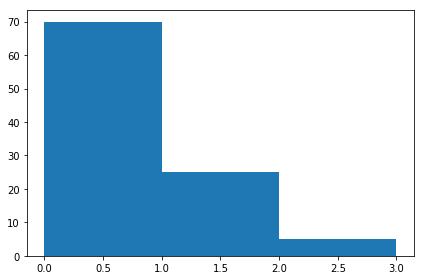

In [7]:
G=redAleatoria(100, 0.005)
redAleatoria_degrees=[(G.degree(e)) for e in G.nodes]
fig, ax = plt.subplots()

n, bins, patches = ax.hist(redAleatoria_degrees, bins=max(redAleatoria_degrees))
fig.tight_layout()
plt.show()

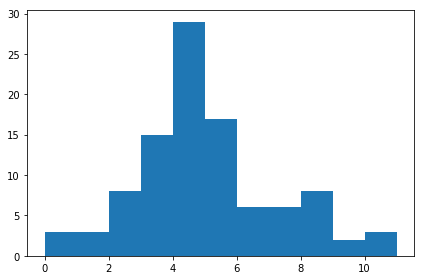

In [8]:
G=redAleatoria(100, 0.05)
redAleatoria_degrees=[(G.degree(e)) for e in G.nodes]
fig, ax = plt.subplots()

n, bins, patches = ax.hist(redAleatoria_degrees, bins=max(redAleatoria_degrees))
fig.tight_layout()
plt.show()

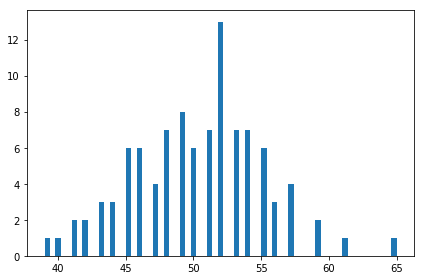

In [9]:
G=redAleatoria(100, 0.5)
redAleatoria_degrees=[(G.degree(e)) for e in G.nodes]
fig, ax = plt.subplots()

n, bins, patches = ax.hist(redAleatoria_degrees, bins=max(redAleatoria_degrees))
fig.tight_layout()
plt.show()

## 3. Aparición del componente gigante

In [17]:
# Valores entre 0 y ln(1000)
valoresGradoMedio = np.linspace(1, 6, num=6)

# Genero la red 5 veces
generarRed = 5
nodos = 1000
acumuladorCompMax = 0

compMayorNodos = []

for gradoMedio in valoresGradoMedio:   
    probabilidad = gradoMedio/nodos
    componenteMax = 0
    for generaciones in range(1,generarRed+1):
        G = redAleatoria(nodos, probabilidad)
        componenteMax = 0
        for componente in [len(c) for c in nx.connected_components(G)]:
            if componente > componenteMax:
                componenteMax = componente
        acumuladorCompMax = acumuladorCompMax + componenteMax
        
    compMayor = acumuladorCompMax/generarRed
    compMayorNodos.append(compMayor/nodos)
compMayorNodos

[0.123, 0.898, 1.842, 2.8234, 3.8168, 4.812]

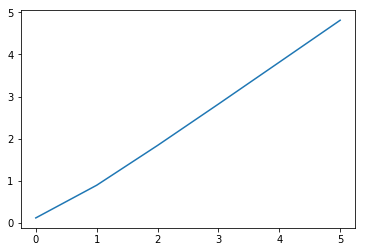

In [18]:
plt.plot(compMayorNodos)